## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.image as mpimg
import splitfolders
from  matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img


2022-07-06 17:23:51.052090: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nevillemthw/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-07-06 17:23:51.052132: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Initializing Data Paths

In [21]:
input_data_path ='/home/nevillemthw/Stenosis-Project/Stenosis detection/input/stenosis/'

split_data_path = '/home/nevillemthw/Stenosis-Project/Stenosis detection/input/'

output_train_data_path = '/home/nevillemthw/Stenosis-Project/output/train/stenosis/'

output_test_data_path = '/home/nevillemthw/Stenosis-Project/output/test/stenosis/'

output_val_data_path = '/home/nevillemthw/Stenosis-Project/output/val/stenosis/'

In [34]:
train_labels = pd.read_csv('train_labels.csv')
train_labels

,filename,xmin,ymin,xmax,ymax
0,14_024_2_0042.bmp,235,156,282,192
1,14_031_4_0031.bmp,419,319,446,349
2,14_046_5_0066.bmp,679,307,699,336
3,14_010_6_0035.bmp,94,244,126,286
4,14_014_1_0015.bmp,163,118,203,151
...,...,...,...,...,...
7488,14_066_7_0059.bmp,229,100,254,160
7489,14_088_8_0077.bmp,512,319,576,347
7490,14_095_7_0045.bmp,199,218,229,273
7491,14_051_6_0026.bmp,258,181,277,216


In [35]:
# Extract xmin, ymin, xmax and ymax from the train_labels.csv file and store them in a list
train_labels_dimensions = []
for i in range(len(train_labels)):
    train_labels_dimensions.append([train_labels.iloc[i]['xmin'], train_labels.iloc[i]['ymin'], train_labels.iloc[i]['xmax'], train_labels.iloc[i]['ymax']])
train_labels_dimensions

[[235, 156, 282, 192],
 [419, 319, 446, 349],
 [679, 307, 699, 336],
 [94, 244, 126, 286],
 [163, 118, 203, 151],
 [104, 202, 152, 269],
 [388, 288, 406, 319],
 [483, 259, 555, 313],
 [66, 168, 100, 193],
 [406, 191, 445, 234],
 [460, 188, 508, 231],
 [178, 220, 228, 272],
 [153, 176, 180, 207],
 [244, 220, 265, 245],
 [506, 465, 584, 598],
 [421, 198, 469, 233],
 [145, 105, 199, 138],
 [471, 267, 551, 319],
 [401, 151, 431, 181],
 [526, 479, 572, 501],
 [145, 331, 198, 350],
 [448, 68, 488, 118],
 [430, 222, 467, 261],
 [428, 200, 458, 233],
 [201, 118, 223, 156],
 [146, 147, 187, 192],
 [156, 84, 177, 111],
 [416, 180, 432, 193],
 [213, 159, 325, 238],
 [149, 524, 230, 566],
 [122, 392, 158, 418],
 [172, 125, 221, 144],
 [464, 282, 490, 325],
 [377, 123, 445, 160],
 [256, 252, 292, 277],
 [438, 212, 500, 271],
 [249, 294, 310, 338],
 [192, 423, 237, 459],
 [694, 271, 726, 295],
 [471, 438, 560, 575],
 [475, 434, 574, 574],
 [150, 85, 203, 107],
 [197, 405, 254, 431],
 [256, 250, 335,

## Visualize Data

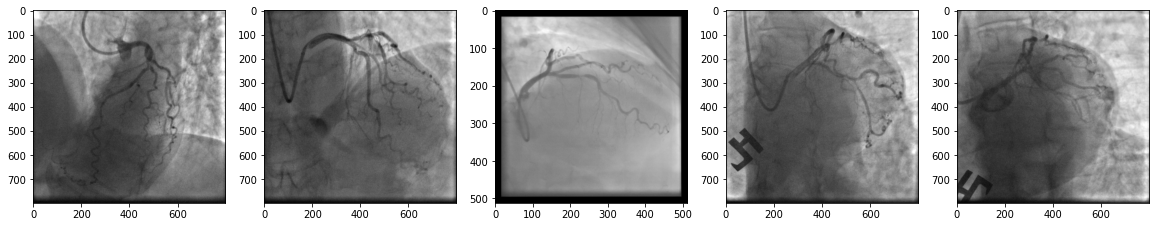

In [5]:
plt.figure(figsize=(20,20))

for i in range(5):
    file_name = random.choice(os.listdir(input_data_path))
    data_image_path= os.path.join(input_data_path, file_name)
    image=mpimg.imread(data_image_path)
    ax=plt.subplot(1,5,i+1)
    plt.imshow(image)

## Split Dataset

In [7]:
splitfolders.ratio(split_data_path, output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 8325 files [00:42, 194.57 files/s]


## Training Model